# Project Week 4: NLP with lyrics

#### Import libraries

In [1]:
import requests
import re
from bs4 import BeautifulSoup
from collections import Counter
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import numpy as np
from PIL import Image
from sklearn.linear_model import LogisticRegression
import argparse
from matplotlib import pyplot as plt
import wordcloud

### Step 1: Getting lyrics through webscraping

#### Define url

In [2]:
d = 'https://www.lyrics.com/artist/Dream-Theater/17134'
a = 'https://www.lyrics.com/artist/Angra/225139'
k = 'https://www.lyrics.com/artist/King-Crimson/4682'

#### Make request and save the response



In [3]:
def requests_and_response(artist):
    """
    TODO
    """
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    page = requests.get(artist, headers=headers)
    response = requests.get(artist)
    rtext = response.text
    print(response)
    return rtext

In [4]:
request_dream = requests_and_response(d)
request_angra = requests_and_response(a)
request_king = requests_and_response(k)


<Response [200]>
<Response [200]>
<Response [200]>


#### Save links


In [5]:
#Specify patterns
pattern_dream = "/lyric/.\d+.Dream.Theater.[A-Za-z+%\d+]+"
pattern_angra = "/lyric.\d+.Angra.[A-Za-z+%\d+]+"
pattern_king = "/lyric.\d+.King.Crimson.[A-Za-z+%\d+]+"

In [6]:
# find all links
dream = re.findall(pattern_dream, request_dream)
angra = re.findall(pattern_angra, request_angra)
king = re.findall(pattern_king, request_king)

In [7]:
#Create the complete links
def create_links(band):
    """
    TODO
    """
    url_list = []
    for i in band:
        str_a = 'https://www.lyrics.com'
        complete_url = str_a + i
        url_list.append(complete_url)
    return url_list    

In [8]:
#Run the function for the three bands and create url lists
url_list_dream = create_links(dream) 
url_list_angra = create_links(angra) 
url_list_king = create_links(king) 

In [9]:
url_list_king

['https://www.lyrics.com/lyric/34916567/King+Crimson/Pictures+of+a+City',
 'https://www.lyrics.com/lyric/34916564/King+Crimson/The+Construkction+of+Light',
 'https://www.lyrics.com/lyric/34916563/King+Crimson/The+Court+of+the+Crimson+King',
 'https://www.lyrics.com/lyric/34916556/King+Crimson/Peace',
 'https://www.lyrics.com/lyric/34916555/King+Crimson/Circus',
 'https://www.lyrics.com/lyric/34916552/King+Crimson/Easy+Money',
 'https://www.lyrics.com/lyric/34916547/King+Crimson/Starless',
 'https://www.lyrics.com/lyric/33884114/King+Crimson/The+Court+of+the+Crimson+King+%28Fragment%29+%5BNovermber+21%2C+1969%5D',
 'https://www.lyrics.com/lyric/33884117/King+Crimson/21st+Century+Schizoid+Man+%5BNovermber+21%2C+1969%5D',
 'https://www.lyrics.com/lyric/33884118/King+Crimson/The+Court+of+the+Crimson+King+%28Fragment%29+%5BNovermber+22%2C+1969%5D',
 'https://www.lyrics.com/lyric/33884121/King+Crimson/21st+Century+Schizoid+Man+%5BNovermber+22%2C+1969%5D',
 'https://www.lyrics.com/lyric/33884

### Step 2: Creating lyrics corpus

#### The three following for loops open the links and write the lyrics to separate files

In [ ]:
for j in url_list_dream:
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    page = requests.get(j, headers=headers)
    response_a = requests.get(j)
    with open('data/'+'dream'+str(url_list_dream.index(j))+'.html', 'w', encoding="utf-8") as file: 
            file.write(response_a.text)   

In [ ]:
for j in url_list_angra:
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    page = requests.get(j, headers=headers)
    response_a = requests.get(j)
    with open('data/'+'angra'+str(url_list_angra.index(j))+'.html', 'w', encoding="utf-8") as file: 
            file.write(response_a.text)     

In [ ]:
for j in url_list_king:
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    page = requests.get(j, headers=headers)
    response_a = requests.get(j)
    with open('data/'+'king'+str(url_list_king.index(j))+'.html', 'w', encoding="utf-8") as file: 
            file.write(response_a.text)     
            

#### The three following for loops open the saved files and creates lyric strings

In [ ]:
lyrics = []
for k in  url_list_dream:
    text = open('data/dream'+str(url_list_dream.index(k))+'.html', encoding="utf-8").read()
    lyric_soup2 = BeautifulSoup(text)
    lyric = lyric_soup2.find(class_="lyric-body")
    if lyric!= None:
            lyric = lyric_soup2.find(class_="lyric-body").text 
            lyric = lyric.split()
            lyric = ' '.join(map(str, lyric)) 
            lyrics.append(lyric)
    else: 
            lyric = lyric_soup2.find(class_="lyric-body")
            lyrics.append(lyric)

In [ ]:
lyrics2 = []
for k in  url_list_angra:
    text = open('data/angra'+str(url_list_angra.index(k))+'.html', encoding="utf-8").read()
    lyric_soup2 = BeautifulSoup(text)
    lyric = lyric_soup2.find(class_="lyric-body")
    if lyric!= None:
            lyric = lyric_soup2.find(class_="lyric-body").text 
            #lyric = lyric.replace('\n', ' ')
            lyric = lyric.split()
            lyric = ' '.join(map(str, lyric)) 
            lyrics2.append(lyric)
    else: 
            lyric = lyric_soup2.find(class_="lyric-body")
            lyrics2.append(lyric)

In [ ]:
lyrics3 = []
for k in  url_list_king:
    text = open('data/king'+str(url_list_king.index(k))+'.html', encoding="utf-8").read()
    lyric_soup2 = BeautifulSoup(text)
    lyric = lyric_soup2.find(class_="lyric-body")
    if lyric!= None:
            lyric = lyric_soup2.find(class_="lyric-body").text 
            lyric = lyric.split()
            lyric = ' '.join(map(str, lyric)) 
            lyrics3.append(lyric)
    else: 
            lyric = lyric_soup2.find(class_="lyric-body")
            lyrics3.append(lyric)

### Step 3: Creating final dfs

#### Dfs are created, subsequently concatenated, and then saved

In [ ]:
df1 = pd.DataFrame({'Lyrics': lyrics, 'Artist': 'Dream Theater'})
df2 = pd.DataFrame({'Lyrics': lyrics2, 'Artist': 'Angra'})
#df3 = pd.DataFrame({'Lyrics': lyrics3, 'Artist': 'King Crimson'})
frames = [df1, df2]
result = pd.concat(frames)
result.to_csv('data/output.csv')

#### Let's open the df again

In [2]:
df = pd.read_csv('data/output.csv')
df

,Unnamed: 0,Lyrics,Artist
0,0,"You built this world around you, your universe...",Dream Theater
1,1,"The anger, the pressure You're choking down yo...",Dream Theater
2,2,"Written on the water, memories dissipate Eyes ...",Dream Theater
3,3,"In a dark and lonely corner, all the time in D...",Dream Theater
4,4,"Someone, someone is trying To tell him somethi...",Dream Theater
...,...,...,...
1048,248,"Simple minded brain, For now you succumb Nothi...",Angra
1049,249,Cry in the night of the angel For their light ...,Angra
1050,250,Vai como um rei (carcará) Voa na presa Espanta...,Angra
1051,251,Enchanted by fierce desire Souls consumed with...,Angra


### Step 4: Creating wordclouds for the bands

In [3]:
angra = df.loc[df['Artist'] == "Angra"]
dream = df.loc[df['Artist'] == "Dream Theater"]
#king = df.loc[df['Artist'] == "King Crimson"]

In [4]:
def create_cloud(band):
    """
    TODO
    """
    
    text = str(band.Lyrics)
    mask = np.array(Image.open('blah.jpg'))

    # Create and generate a word cloud image:
    cloud = wordcloud.WordCloud(background_color="black", mask=mask, width=1200, height=600, contour_color='steelblue').generate(text)

    # Display the generated image:
    plt.figure(figsize=(10,10))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


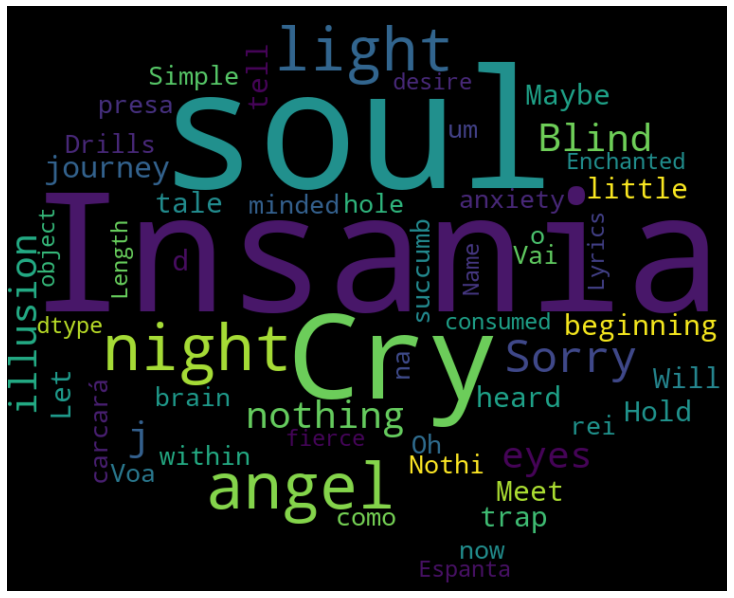

In [5]:
create_cloud(angra)

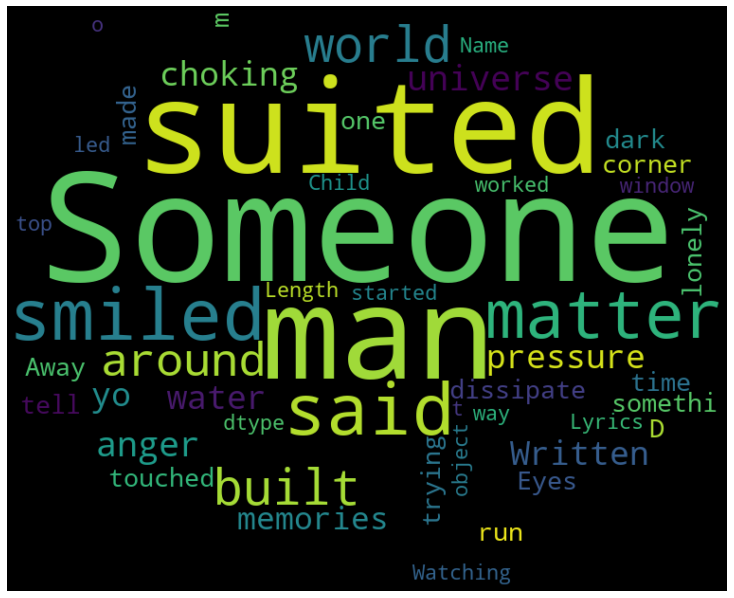

In [6]:
create_cloud(dream)

### Step 5: Implementing the model

In [7]:
def load_data(df):
    """
    TODO
    """
    
    df = pd.read_csv('data/output.csv')
    
    df = df.dropna()
    
    corpus = df['Lyrics'].to_list()
    for words in corpus:
        words.split()
    
    labels = df['Artist'].to_list()
    
    X = corpus
    y = labels
    
    return X, y 

In [8]:
def feature_engineering(X):
    """
    TODO
    """
   
    tf_vec = TfidfVectorizer(stop_words= ['is'])
    tv_vec = tf_vec.fit(X)
    X_trans = tf_vec.transform(X).todense()
    
    return X_trans, tf_vec


In [9]:
def train_model(X, y):
    """
    TODO    
    """
    tf_vec = TfidfVectorizer()
    nb = MultinomialNB(alpha = 1)
    model = make_pipeline(tf_vec, nb)
    model.fit(X, y)
    
    return model

In [10]:
def build_model_RF():
    """
    TODO
    """    

    m = RandomForestClassifier(class_weight = "balanced", random_state = 42)
    
    parameters = {'max_depth':[10, 50, 100],'n_estimators':[50, 100, 200]}
    
    cv = GridSearchCV(m, param_grid = parameters)
    return cv

##### Make prediction

In [11]:
def main():
    X, y = load_data(df)
    print('Loading the data...')    
    
    print('---------------------------------------------------------------------------------------------------')
    
    print('Let us first attempt the Naive Bayes estimator!')
     
    print('Building and fitting the model..')
    model = train_model(X, y)
    snippet = [input("Please type a snippet from a lyric:")]
    prediction = model.predict(snippet)
    probabilities = model.predict_proba(snippet)
    probabilities = np.round(probabilities, 2)
    print("The most likely artist for this snippet is:")
    print(prediction)
    print ("These are the two model classes and their respective probabilities:")
    print(model.classes_)
    print(probabilities)
      
    print('---------------------------------------------------------------------------------------------------')

    print('Now let us try the Random Forest...')
    
    X_trans, tf_vec = feature_engineering(X)
    print('Performing feature engineering for the Random Forest...')
    
    m = build_model_RF()
    print('Building the model...')
    m = m.fit(np.asarray(X_trans), y)   
    print('Fitting the model...')
    snippet = [input("Please type a snippet from a lyric:")]
    a = m.predict(tf_vec.transform(snippet))      
    print("The most likely artist for this snippet is:")
    print(a)
    b = m.predict_proba(tf_vec.transform(snippet))    
    b = np.round(b, 2)
    print ("These are the two model classes and their respective probabilities:")
    print (m.classes_)
    print(b)
    print('---------------------------------------------------------------------------------------------------')
    print("In your opinion, which estimator performed better?")
         
if __name__ == '__main__':
    main()   

Loading the data...
---------------------------------------------------------------------------------------------------
Let us first attempt the Naive Bayes estimator!
Building and fitting the model..
Please type a snippet from a lyric:this angel is in insania
The most likely artist for this snippet is:
['Dream Theater']
These are the two model classes and their respective probabilities:
['Angra' 'Dream Theater']
[[0.25 0.75]]
---------------------------------------------------------------------------------------------------
Now let us try the Random Forest...
Performing feature engineering for the Random Forest...
Building the model...
Fitting the model...
Please type a snippet from a lyric:this angel is in insania
The most likely artist for this snippet is:
['Angra']
These are the two model classes and their respective probabilities:
['Angra' 'Dream Theater']
[[0.7 0.3]]
---------------------------------------------------------------------------------------------------
In your opinio